In [1]:
from scripts import *



In [2]:
weights,true_lat = get_global_weights()

In [3]:
#iterate over every directory
all_dirs = ['/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone100yr_L2_23_RN_m6']  
print (all_dirs)
df = process_all_data(all_dirs,weights,true_lat)

['/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone100yr_L2_23_RN_m6']
all dirs  ['/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/speedyone100yr_L2_23_RN_m6']


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

In [4]:
df

,temperature,label,level,precision,title,X
0,286.173179,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,0
1,286.894308,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,1
2,287.117233,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,2
3,287.189756,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,3
4,287.236838,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,4
...,...,...,...,...,...,...
36496,291.806831,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,36496
36497,291.814138,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,36497
36498,291.789227,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,36498
36499,291.740295,speedyone100yr_L2_23_RN_m6,L2,23_RN,EC Earth SST. ablco2=6,36499


In [6]:
window = 365
df_mean = df.groupby([df.index//window, 'label','level','precision', 'title'],as_index=False).mean()



In [9]:
def plot_config(ax1,ax2,save):
    

    #Config
    plt.subplots_adjust(wspace=0.1, hspace=0)

    ax1.set_ylabel("Gloabl Mean Surface Temperature (K)")#, fontsize = 20)
    ax2.set_ylabel("Absolute Error (K)")#, fontsize = 20)


    ax2.set_xlabel("Time (days)")#, fontsize = 20)
    ax2.axhline(0.0, c='0.5', linestyle='--')
    

   # ax1.set_xlim(0,400)
    ax1.set_ylim(288.5,292)

    #Other config
    ax1.legend().set_title(None)
    
    if save:
        plt.savefig('figs/Fig1_Williams.png', dpi=300, bbox_inches='tight')


    
    
def get_relative_error_df(df):
    
    
    #Get a ground truth that all others will be compared against
    df_truth = df.query('precision == "52_RN" ')[['X', 'temperature']]
    df_truth['merge_column'] = df_truth['X'].astype(int)
    
    #Get the others
    df_rest = df.query('precision != "52_RN" ').reset_index(drop=True) #rest index to avoid SettingWithCopyWarning
    df_rest['merge_column'] = df_rest['X'].astype('int') 
    
    #Note integer conversions are needed for join

    #Rejoin - maybe a more efficient way to do this?
    df_join = pd.merge(df_rest,df_truth,how='left',on='merge_column', suffixes=(None, 'truth'))
    
    
    #Get the absolute error
    df_join['error']  = df_join['temperature'] - df_join['temperaturetruth']
    
    
    return df_join
    
def plot_error_timeseries(df,save_it):
    
    #Setup plot env
    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    

    
    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(h,w))
    
    
    #Plot the df directly
    p = sns.lineplot(data=df, x="X", y='temperature', hue="precision",ax=ax1,style='precision',markers=True)


    #Calculate the relative_error df and plot
    df_error = get_relative_error_df(df)
    p = sns.lineplot(data=df_error, x="X", y='error', hue="precision",ax=ax2,style='precision',markers=True,legend=None)


    plot_config(ax1,ax2,save_it)

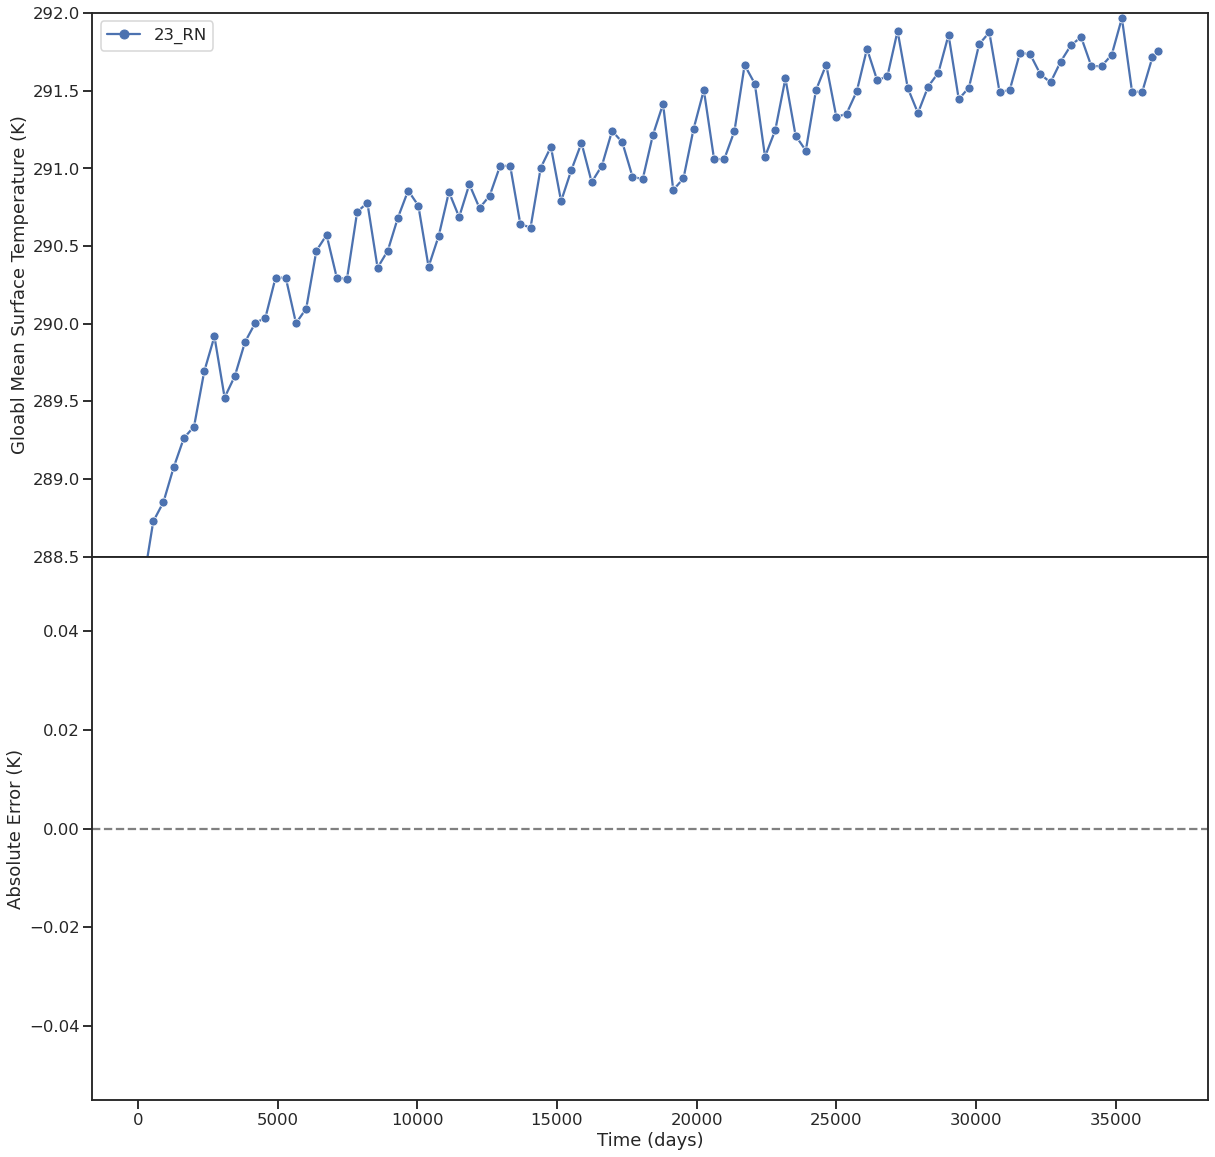

In [10]:
#...and plot is
save_it = False #Do you want to save the Fig?
plot_error_timeseries(df_mean,save_it)